# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Propriva have the most data which would allow for high confidence in their results.
- Capomulin and Ramicane appear to be the most effective in reducing tumor growth as they show lower average tumor volume when compared to infubinol and Ceftamin
- There appears to be a positive correleation between weight of mouse and average tumor volume indicating that mouses with higher weights are likely to have larger tumor volumes.
 

In [203]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [67]:
# Checking the number of mice.
unique_ids = mouse_results['Mouse ID'].nunique()
unique_ids

249

In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mouse_results.loc[(mouse_results["Mouse ID"]=="g989")]
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results = mouse_results.drop(mouse_results[mouse_results["Mouse ID"] == "g989"].index)
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Checking the number of mice in the clean DataFrame.
unique_ids = mouse_results['Mouse ID'].nunique()
unique_ids

248

## Summary Statistics

In [210]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = mouse_results.set_index(["Drug Regimen"])

mean_tumor_volume = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

median_tumor_volume = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

tumor_volume_variance =  mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

tumor_volume_stddev = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_stderror = mouse_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stddev,
    "Tumor Volume Std. Err.": tumor_volume_stderror,
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

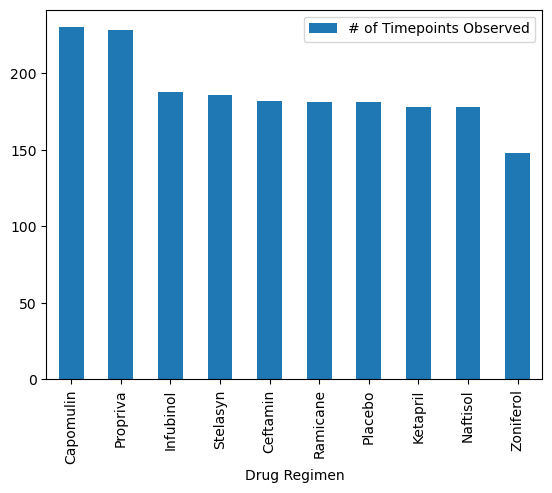

In [212]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = mouse_results['Drug Regimen'].unique()
drug_groups = mouse_results.groupby('Drug Regimen')
timepoints_observed =drug_groups['Drug Regimen'].value_counts()
collated_df= pd.DataFrame({
    "Drug Regimen": drug_regimen,
    "# of Timepoints Observed": timepoints_observed
})
sorted_df = collated_df.sort_values(by = '# of Timepoints Observed', ascending=False)
bar_chart = sorted_df.plot.bar(x='Drug Regimen', y='# of Timepoints Observed', rot=0)
plt.xticks(rotation=90)
plt.show()

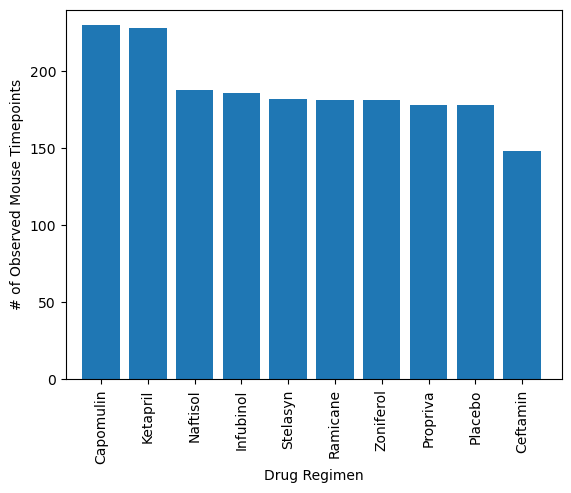

In [213]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = mouse_results['Drug Regimen'].unique()
drug_groups = mouse_results.groupby('Drug Regimen')
timepoints_observed =drug_groups['Drug Regimen'].value_counts()
collated_df= pd.DataFrame({
    "Drug Regimen": drug_regimen,
    "# of Timepoints Observed": timepoints_observed
})
sorted_df = collated_df.sort_values(by = '# of Timepoints Observed', ascending=False)

plt.bar(sorted_df['Drug Regimen'],sorted_df['# of Timepoints Observed'], alpha=1, align="center")
plt.xticks(tick_locations, drug_regimen, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.15)
plt.ylim(0, max(timepoints_observed)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

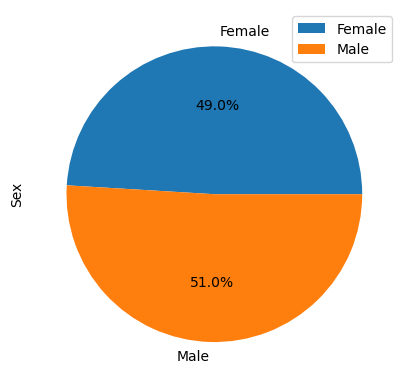

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = mouse_results['Sex'].unique()
gender_groups = mouse_results.groupby('Sex')
sex = gender_groups['Sex'].value_counts()

gender_df = pd.DataFrame({
    "Gender": labels,
    "Sex": sex
})

gender_df.plot.pie(y='Sex',
                   labels=gender_df['Gender'],
                   autopct='%1.1f%%')
plt.show()


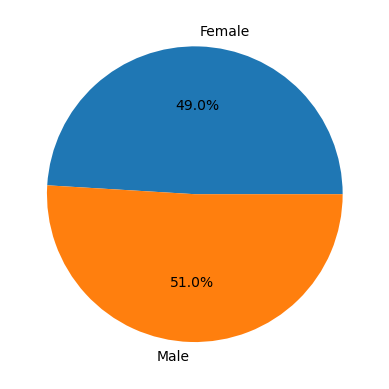

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_results['Sex'].unique()
gender_groups = mouse_results.groupby('Sex')
sex = gender_groups['Sex'].value_counts()

gender_df = pd.DataFrame({
    "Gender": labels,
    "Sex": sex
})
plt.pie(sex, labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [220]:
mouse_id = mouse_results.set_index(["Mouse ID"])
max_timepoint = pd.DataFrame(mouse_results.groupby(["Mouse ID"])["Timepoint"].max())
max_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(mouse_results.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(mouse_results, max_timepoint, on = ["Mouse ID", "Timepoint"])
final_tumor_vol = final_tumor_vol.set_index(["Mouse ID"])

In [276]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_tumor_vol =[]
rami_tumor_vol =[]
infu_tumor_vol =[]
ceft_tumor_vol =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    for index, row in final_tumor_vol.iterrows():
        if drug in row['Drug Regimen']=="Capomulin":
            capo_tumor_vol.append(row['Tumor Volume (mm3)'])
        
        elif drug in row['Drug Regimen']=="Ramicane":
            rami_tumor_vol.append(row['Tumor Volume (mm3)'])

        elif drug in row['Drug Regimen']=="Infubinol":
            infu_tumor_vol.append(row['Tumor Volume (mm3)'])

        elif drug in row['Drug Regimen']=="Ceftamin":
            ceft_tumor_vol.append(row['Tumor Volume (mm3)'])
    # add subset 
    
    # Determine outliers using upper and lower bounds
tumor_vol_df = pd.DataFrame({'Capomulin': capo_tumor_vol,
                        'Ramicane': rami_tumor_vol,
                        'Infubinol': infu_tumor_vol,
                        'Ceftamin': ceft_tumor_vol
                       })
for drug in treatments:
    quartiles = tumor_vol_df[drug].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*  iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers =[]
    for index, row in tumor_vol_df.iterrows():
        if row[drug] > upper_bound or row[drug] < lower_bound:
            outliers.append(row[drug])
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


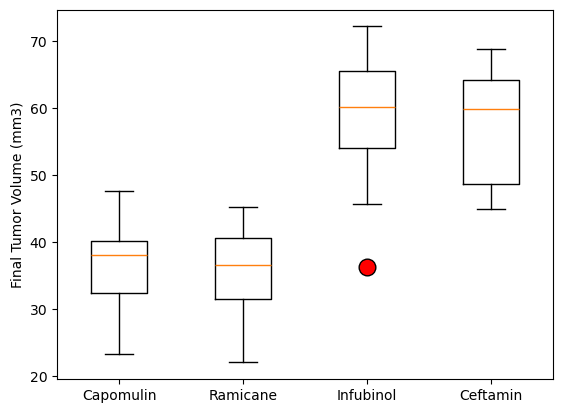

In [282]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([tumor_vol_df['Capomulin'],
             tumor_vol_df['Ramicane'],
             tumor_vol_df['Infubinol'],
             tumor_vol_df['Ceftamin']], flierprops={'marker': 'o', 'markerfacecolor':'red', 'markersize': 12})
plt.xticks(range(1, len(treatments)+1), treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

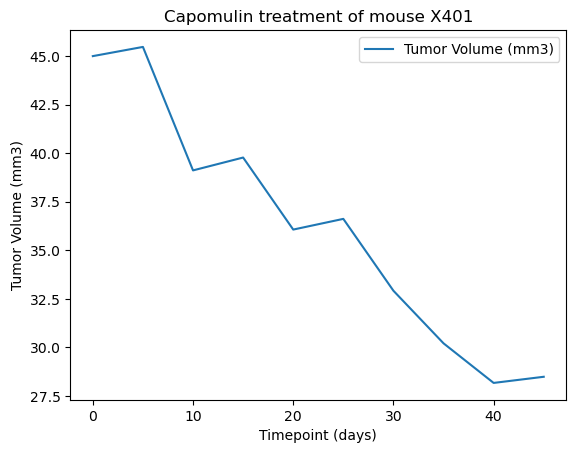

In [306]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x401_results = mouse_results.loc[(mouse_results["Mouse ID"]=="x401")]
x401_results.plot.line(x=x401_results.columns[1], y=x401_results.columns[2])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse X401")
plt.show()

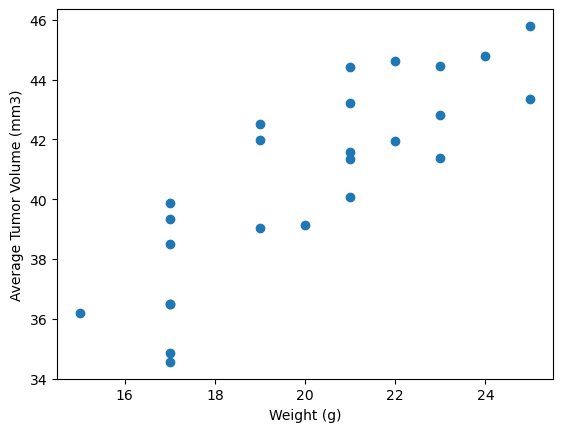

In [337]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_results = mouse_results.loc[(mouse_results["Drug Regimen"]=="Capomulin")]
capomulin_results = capomulin_results.set_index(["Mouse ID"])
average_tumor = capomulin_results.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight= capomulin_results.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


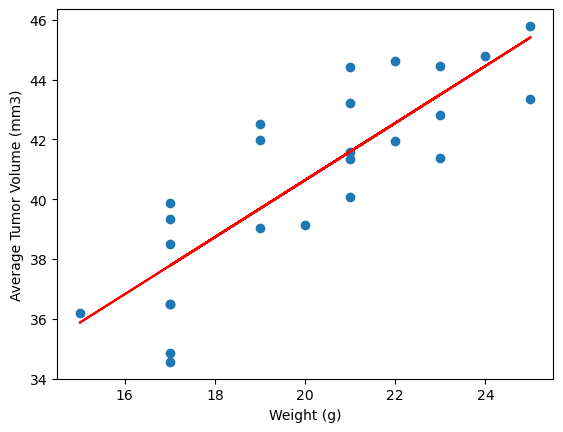

In [351]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# calculate correlation coefficient
correlation=st.pearsonr(mouse_weight, average_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mouse_weight, average_tumor)

#calculate line of best fit
pe_fit = pe_slope * mouse_weight + pe_int

plt.scatter(mouse_weight, average_tumor)
plt.plot(mouse_weight, pe_fit, 'r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()